## Challenge 1
<div class="alert alert-warning">
Aggregate these login counts based on 15­ minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand.
    <br/>

Please report/illustrate important features of the demand, such as daily cycles.
<br/>
    
If there are data quality issues, please report them.
</div>

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np

from datetime import datetime

import seaborn as sns

In [11]:
df = pd.read_json("./data/logins.json")
df['count'] = 1
df.dtypes

login_time    datetime64[ns]
count                  int64
dtype: object

In [12]:
# Set login time as index
df = df.set_index(df['login_time'])[['count']]

In [13]:
Intervals_15 = df.resample("15T").count()
Intervals_15

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
...,...
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2


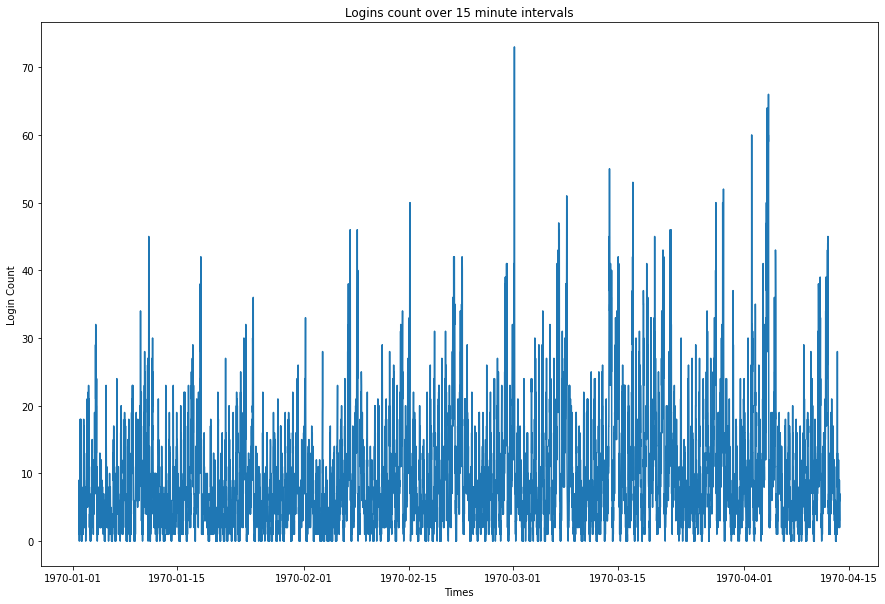

In [14]:
fig, ax = plt.subplots(figsize = (15,10))
plt.xlabel('Times')
plt.ylabel('Login Count')
plt.title("Logins count over 15 minute intervals")
plt.plot(Intervals_15.index, Intervals_15['count'])

<div class="alert alert-success">
<strong>
There seems to be a patternt that is being represented here. Not really clear what that pattern is in this graph. But we can seee that during certain times the login count does seem to peak and the graph seems to be quite following a wave like pattern.
    </strong>
</div>

***

## Lets try to analyze the daily cycles

In addition, we will try to seperate out the weekdays to see if there is difference between the login counts

In [46]:
logins_daily = df.resample('D').sum()

# Get the day of the week for each of the login time
logins_daily['dayOfTheWeek'] = [datetime.strptime(str(i), '%Y-%m-%d %H:%M:%S').weekday() for i in logins_daily.index]
logins_saturday = logins_daily[logins_daily['dayOfTheWeek'] == 5]
logins_sunday = logins_daily[logins_daily['dayOfTheWeek'] == 6]

logins_friday = logins_daily[logins_daily['dayOfTheWeek'] == 4]

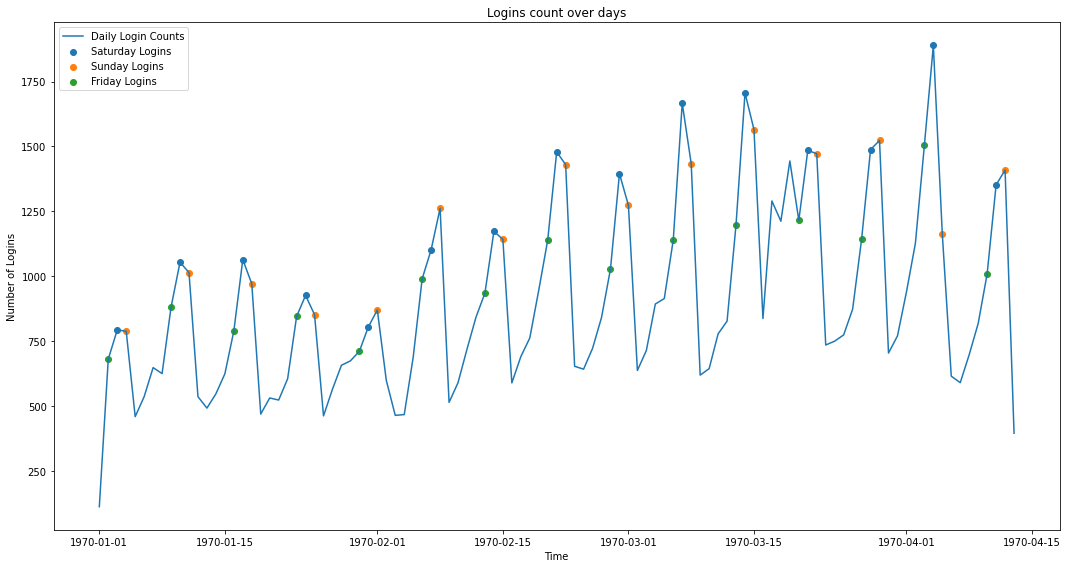

In [47]:
fig, ax = plt.subplots(figsize = (15,8))
plt.xlabel('Time')
plt.ylabel('Number of Logins')
plt.title('Logins count over days')

plt.plot(logins_daily.index, logins_daily['count'], label = 'Daily Login Counts')
plt.scatter(logins_saturday.index, logins_saturday['count'], label = 'Saturday Logins')
plt.scatter(logins_sunday.index, logins_sunday['count'], label = 'Sunday Logins')
plt.scatter(logins_friday.index, logins_friday['count'], label = 'Friday Logins')

plt.legend(loc='upper left')
plt.tight_layout()

<div class="alert alert-success">
<strong>
Based on this graph one thing is clear and that is that more people login in during the weekends compared to the weekdays. In addition, Fridays also seems to be busier compared to the rest weekdays and the login count seems to follow a strange pattern of increasing thoughout the week and dropping off at monday. If I were to guess the product I would say it is some type of streaming platform like Netflix or Hulu as most people tend to use it over the weekends and fridays.
</strong>
</div>

***

## Let's analyze how the login counts vary in terms of hours

In [8]:
logins_hourly = df.resample('H').sum()
a = logins_hourly.index.astype(str).str.split().tolist()
logins_hourly[['Date', 'Time']] = a

In [16]:
logins_by_24hr_time = logins_hourly.groupby('Time').sum()

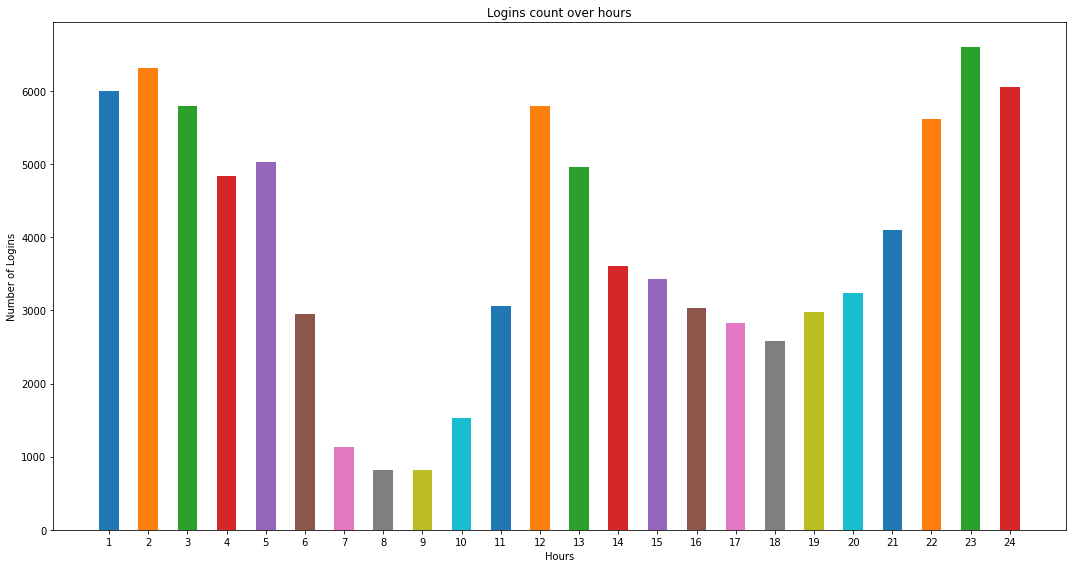

In [17]:
fig, ax = plt.subplots(figsize = (15,8))
plt.xlabel('Hours')
plt.ylabel('Number of Logins')
plt.title('Logins count over hours')

for i in range(1, 25):
    plt.bar(i, logins_by_24hr_time['count'].tolist()[i - 1], width = 0.5)

plt.xticks([i for i in range(1, 25)])

plt.tight_layout()

<div class="alert alert-success">
<strong>
This graph shows that most login's occur during the times of 1 AM - 5 AM, 12PM - 1PM, and from 10PM - 11PM.
</strong>
</div>